In [75]:
import yt
from yt import YTArray
from yt import YTQuantity

from astropy import constants as const

import numpy as np
import h5py as h5

import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.colors import SymLogNorm, LogNorm



import palettable
import plotting_tools as pt
import yt_functions as ytf



In [3]:
i = 50
folder = 'production/isocool_tctf_0.3_beta_100.0_cr_1.0_tdiff_1.0'
ds = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i), load_cr = 1)


yt : [INFO     ] 2020-01-27 11:30:50,571 Parameters: current_time              = 1.4999997019519
yt : [INFO     ] 2020-01-27 11:30:50,572 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 11:30:50,573 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 11:30:50,574 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 11:30:50,575 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 11:30:50,596 Gathering a field list (this may take a moment.)


In [84]:
def get_histogram(ds, field, field_range = None, weighted = True, use_log = True, nbins = 100):
    ad = ds.all_data()
    z_abs_code = np.abs(ad[('gas', 'z')] / ds.length_unit.in_units('kpc'))
    z_max = 1.2
    z_min = 0.8
    zmask = (z_abs_code >= z_min) & (z_abs_code <= z_max)
        
    final = ad[('gas', field)][zmask].d
    if weighted:
        weights = np.array(ad[('gas', 'cell_mass')][zmask].in_units('Msun'))
    else:
        weights = np.ones(len(final))
    
    if use_log:
        final = np.log10(final)
        
    if field_range == None:
        if field == 'temperature':
            field_range = (4.25, 7)
        elif field == 'density':
            field_range = (-28.25, -25)
    
    hist, bin_edges = np.histogram(final, weights = weights, range = field_range, density = True, bins = nbins)
    return hist, bin_edges

In [18]:
hist, bin_edges = get_histogram(ds, 'temperature', weighted = True)

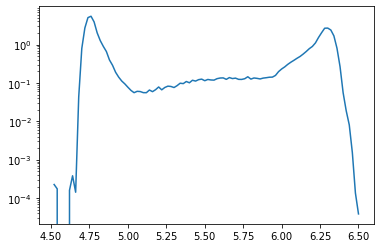

In [19]:
plt.plot(bin_edges[1:], hist)
plt.yscale('log')

In [89]:
temp = .5*(bin_edges[1:] + bin_edges[:-1])
y_T = .5*(T_bin_edges[1:] + T_bin_edges[:-1])
y_rho = .5*(rho_bin_edges[1:] + rho_bin_edges[:-1])
x = np.arange(len(temp))

In [87]:
rho = np.ndarray(shape = (100, 100))
T = np.ndarray(shape = (100, 100))

In [88]:
for i in range(100):
    ds = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i), load_cr = 1)   
    rho_hist, rho_bin_edges = get_histogram(ds, 'density', weighted = True)
    T_hist, T_bin_edges = get_histogram(ds, 'temperature', weighted = True)

    for j in range(100):
        rho[j][i] = rho_hist[j]
        T[j][i] = T_hist[j]
        


yt : [INFO     ] 2020-01-27 13:26:43,526 Parameters: current_time              = 0
yt : [INFO     ] 2020-01-27 13:26:43,527 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:26:43,528 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:26:43,529 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:26:43,530 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 13:26:43,534 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-01-27 13:26:58,031 Parameters: current_time              = 0.029999701922051
yt : [INFO     ] 2020-01-27 13:26:58,034 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:26:58,035 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:26:58,036 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:26:58,037 Parameters: cosmological_s

yt : [INFO     ] 2020-01-27 13:30:08,590 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 13:30:08,604 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-01-27 13:30:23,663 Parameters: current_time              = 0.44999970195186
yt : [INFO     ] 2020-01-27 13:30:23,665 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:30:23,667 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:30:23,668 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:30:23,669 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 13:30:23,694 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-01-27 13:30:40,306 Parameters: current_time              = 0.47999970195186
yt : [INFO     ] 2020-01-27 13:30:40,309 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:30:40,310 Parameters: domain_left_edge  

yt : [INFO     ] 2020-01-27 13:33:50,966 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:33:50,967 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:33:50,967 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 13:33:50,993 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-01-27 13:34:05,634 Parameters: current_time              = 0.89999970195186
yt : [INFO     ] 2020-01-27 13:34:05,636 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:34:05,637 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:34:05,638 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:34:05,639 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 13:34:05,660 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-01-27 13:34:20,462 Parameters: current_time      

yt : [INFO     ] 2020-01-27 13:37:32,378 Parameters: current_time              = 1.3199997035848
yt : [INFO     ] 2020-01-27 13:37:32,391 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:37:32,392 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:37:32,393 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:37:32,395 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 13:37:32,413 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-01-27 13:37:47,860 Parameters: current_time              = 1.3499997011927
yt : [INFO     ] 2020-01-27 13:37:47,863 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:37:47,864 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:37:47,865 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:37:47,865 Parameters: co

yt : [INFO     ] 2020-01-27 13:40:56,939 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 13:40:56,967 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-01-27 13:41:11,736 Parameters: current_time              = 1.7699997011442
yt : [INFO     ] 2020-01-27 13:41:11,739 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:41:11,740 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:41:11,741 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:41:11,741 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 13:41:11,760 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-01-27 13:41:25,603 Parameters: current_time              = 1.7999997024556
yt : [INFO     ] 2020-01-27 13:41:25,606 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:41:25,607 Parameters: domain_left_edge    

yt : [INFO     ] 2020-01-27 13:44:48,569 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:44:48,570 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:44:48,571 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 13:44:48,582 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-01-27 13:45:05,671 Parameters: current_time              = 2.2199997038866
yt : [INFO     ] 2020-01-27 13:45:05,673 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:45:05,674 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:45:05,675 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:45:05,676 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 13:45:05,756 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-01-27 13:45:21,366 Parameters: current_time       

yt : [INFO     ] 2020-01-27 13:48:41,774 Parameters: current_time              = 2.6399997008451
yt : [INFO     ] 2020-01-27 13:48:41,776 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:48:41,777 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:48:41,778 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:48:41,779 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2020-01-27 13:48:41,792 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-01-27 13:48:56,805 Parameters: current_time              = 2.669999700073
yt : [INFO     ] 2020-01-27 13:48:56,808 Parameters: domain_dimensions         = [ 64  64 256]
yt : [INFO     ] 2020-01-27 13:48:56,809 Parameters: domain_left_edge          = [-0.5 -0.5 -2. ]
yt : [INFO     ] 2020-01-27 13:48:56,811 Parameters: domain_right_edge         = [0.5 0.5 2. ]
yt : [INFO     ] 2020-01-27 13:48:56,812 Parameters: cos

Text(0, 0.5, 'Log T (K)')

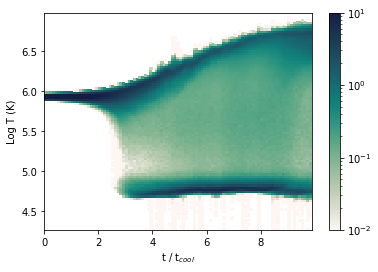

In [90]:
fig, ax = plt.subplots()
cmap = palettable.cmocean.sequential.Matter_20.mpl_colormap
cmap = palettable.cmocean.sequential.Thermal_20_r.mpl_colormap
cmap = palettable.cmocean.sequential.Tempo_20.mpl_colormap

im = ax.pcolormesh(np.divide(x, 10), y_T, T, norm = LogNorm(), cmap = cmap, vmin = 1e-2, vmax = 10)
fig.colorbar(im, ax = ax)
ax.set_xlabel('t / t$_{cool}$')
ax.set_ylabel('Log T (K)')


Text(0, 0.5, 'Log T (K)')

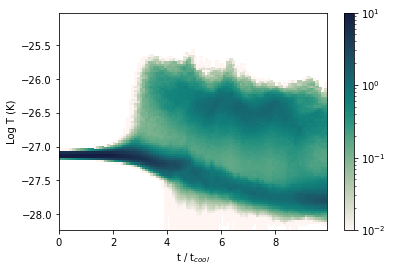

In [91]:
fig, ax = plt.subplots()
cmap = palettable.cmocean.sequential.Matter_20.mpl_colormap
cmap = palettable.cmocean.sequential.Thermal_20_r.mpl_colormap
cmap = palettable.cmocean.sequential.Tempo_20.mpl_colormap

im = ax.pcolormesh(np.divide(x, 10), y_rho, rho, norm = LogNorm(), cmap = cmap, vmin = 1e-2, vmax = 10)
fig.colorbar(im, ax = ax)
ax.set_xlabel('t / t$_{cool}$')
ax.set_ylabel('Log T (K)')


In [39]:
for i in range(100):
    for j in range(100):
        C[j][i] = hist[j]

In [76]:
pdf_file = h5.File('temp.h5', 'a')

In [77]:
pdf_file.create_dataset('temperature', data = C)

<HDF5 dataset "temperature": shape (100, 100), type "<f8">

In [78]:
pdf_file.create_dataset('time', data = np.divide(x, 10))
pdf_file.create_dataset('temperature_bins', data = y)

<HDF5 dataset "temperature_bins": shape (100,), type "<f8">

In [79]:
pdf_file.close()


In [80]:
test = h5.File('temp.h5', 'r')
data = test['temperature']


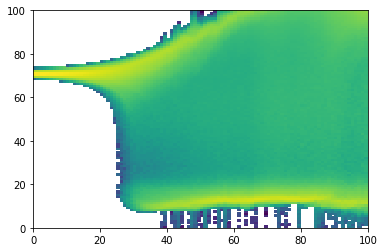

In [83]:
plt.pcolormesh(data, norm = LogNorm())